In [70]:
%run "INCLASS_STARTPY_SETTINGS.ipynb"
import datetime as dt
import yfinance as yf

IMPORTING BASIC PYTHON LIBRARIES
pandas as pd
numpy as np
matplotlib as plot
seaborn as sns
****************Ending Library Import*****************


## Read in Covid File, and do some rudimentary data exploration

In [71]:
covid = pd.read_csv('/Users/maisonwhitehall/Desktop/Self-Project Covid impact on industry/owid-covid-data.csv', parse_dates=['date'])
#covid['date'] = pd.to_datetime(covid['date'], format='%Y-%m-%d')

In [72]:
covid['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [73]:
covid['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'England', 'Equatorial Guine

In [74]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

## Reshape Covid Dataset to only include the US, some of the more important information, and to only be from 2020-2022

In [75]:
#Cut data so that is only holds rows for continent(North Ameirca),location(United States),
#total_cases, total_Deaths, population

covidUS = ['United States']
covidUS2 = covid[covid['location'].isin(covidUS)]

covid2 = covidUS2[['continent', 'location', 'date', 'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 'population']]
covid2.sample(20)

,continent,location,date,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,population
403968,North America,United States,2021-06-05,61.83,1.48,338289856
404785,North America,United States,2023-08-31,NaN,0.45,338289856
403966,North America,United States,2021-06-03,61.83,1.48,338289856
404607,North America,United States,2023-03-06,95.30,0.92,338289856
403518,North America,United States,2020-03-12,0.16,0.01,338289856
403582,North America,United States,2020-05-15,76.23,5.34,338289856
404147,North America,United States,2021-12-01,247.79,2.38,338289856
404807,North America,United States,2023-09-22,NaN,0.59,338289856
404330,North America,United States,2022-06-02,309.83,1.10,338289856
404281,North America,United States,2022-04-14,84.16,1.45,338289856


In [76]:
#Cut data so that is only holds rows from 2020 to 2022
#covid3 = covid2[covid2['date'].dt.year.isin([2020, 2021, 2022])]
covid3 = covid2[(covid2['date'] >= '2020-01-01') & (covid2['date'] <= '2022-12-31')]

covid3.tail(20)

,continent,location,date,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,population
404523,North America,United States,2022-12-12,193.34,1.27,338289856
404524,North America,United States,2022-12-13,193.34,1.27,338289856
404525,North America,United States,2022-12-14,193.34,1.27,338289856
404526,North America,United States,2022-12-15,193.34,1.27,338289856
404527,North America,United States,2022-12-16,193.34,1.27,338289856
404528,North America,United States,2022-12-17,193.34,1.27,338289856
404529,North America,United States,2022-12-18,186.56,1.11,338289856
404530,North America,United States,2022-12-19,186.56,1.11,338289856
404531,North America,United States,2022-12-20,186.56,1.11,338289856
404532,North America,United States,2022-12-21,186.56,1.11,338289856


In [77]:
covid3.isna().sum()

continent                          0
location                           0
date                               0
new_cases_smoothed_per_million     5
new_deaths_smoothed_per_million    5
population                         0
dtype: int64

## Using yfinance API to get dataset for 3 diffenent ETFs

In [78]:
#Start and end date for easier navigation in the future
start = "2020-01-01"
end   = "2022-12-31"
freq = 'W-MON' #Frequency is weekly, starting on monday 

#Dictionary with Ticker Names for navigation with yfinance 
tickers_names = {
    'Entertainment': ['XLC'],   # Communication Services
    'Tech': ['XLK'],            # Technology
    'Pharma': ['XLV']           # Healthcare
}

all_tickers = [t for lst in tickers_names.values() for t in lst] #Flatten the list with the tickers


In [79]:
#Function that gets the adjusted closing price. This is better when looking at historical finance data.  
def getETFData(tickers, start, end):
    data = yf.download(tickers, start=start, end=end, progress=False, group_by='ticker', auto_adjust=False)
    
    # yfinance returns different shapes when single vs multiple, so we standardize
    adj_close = pd.DataFrame()
    for t in tickers:
        try:
            adj_close[t] = data[t]['Adj Close']
            
        except Exception:
            # multi-index or single-index case
            if 'Adj Close' in data.columns:
                adj_close[t] = data['Adj Close']
                
            else:
                raise
    return adj_close

In [80]:

adj = getETFData(all_tickers, start, end)
adj = adj.sort_index()

adj_weekly = adj.resample(freq).last().dropna(how='all') #Resamples df to weekly instead of daily 

logret = np.log(adj_weekly / adj_weekly.shift(1)).dropna(how='all') #for weekly log returns for better modeling

industry_index = {}
for industry, tickers in tickers_names.items():
    industry_index[industry] = (adj_weekly[tickers].mean(axis=1)).rename(industry)

industry_index_df = pd.concat(industry_index, axis=1)
industry_index_norm = industry_index_df / industry_index_df.iloc[0] * 100

In [81]:
industry_index

{'Entertainment': Date
 2020-01-06    51.731194
 2020-01-13    52.725475
 2020-01-20    53.672417
 2020-01-27    51.911106
 2020-02-03    51.655437
                 ...    
 2022-12-05    49.530487
 2022-12-12    48.280594
 2022-12-19    45.466152
 2022-12-26    46.427731
 2023-01-02    46.612278
 Freq: W-MON, Name: Entertainment, Length: 157, dtype: float64,
 'Tech': Date
 2020-01-06     88.043556
 2020-01-13     90.868629
 2020-01-20     92.381042
 2020-01-27     90.469109
 2020-02-03     91.876900
                  ...    
 2022-12-05    130.079330
 2022-12-12    130.724289
 2022-12-19    122.916321
 2022-12-26    122.112694
 2023-01-02    121.955902
 Freq: W-MON, Name: Tech, Length: 157, dtype: float64,
 'Pharma': Date
 2020-01-06     92.843300
 2020-01-13     93.362801
 2020-01-20     95.231140
 2020-01-27     92.670143
 2020-02-03     91.175438
                  ...    
 2022-12-05    131.738983
 2022-12-12    132.700089
 2022-12-19    128.488251
 2022-12-26    130.045746
 2023-0

In [82]:
industry_index_df

,Entertainment,Tech,Pharma
Date,,,
2020-01-06,51.731194,88.043556,92.843300
2020-01-13,52.725475,90.868629,93.362801
2020-01-20,53.672417,92.381042,95.231140
2020-01-27,51.911106,90.469109,92.670143
2020-02-03,51.655437,91.876900,91.175438
...,...,...,...
2022-12-05,49.530487,130.079330,131.738983
2022-12-12,48.280594,130.724289,132.700089
2022-12-19,45.466152,122.916321,128.488251


In [83]:
industry1 = industry_index_norm

In [84]:
industry1.head(10)

,Entertainment,Tech,Pharma
Date,,,
2020-01-06,100.000000,100.000000,100.000000
2020-01-13,101.922016,103.208722,100.559546
2020-01-20,103.752520,104.926523,102.571904
2020-01-27,100.347784,102.754946,99.813496
2020-02-03,99.853558,104.353917,98.203573
2020-02-10,102.855552,109.161611,101.688408
2020-02-17,104.228442,110.155558,102.022170
2020-02-24,99.286123,102.992657,98.331183
2020-03-02,96.137658,100.993965,95.170306


## Preparing and checking Covid Dataset for merging with Industry dataset

In [85]:
#Resample to match indstry dataset and get weekly instead of daily
covid4 = covid3.set_index('date').resample('W-MON').sum().reset_index()
covid4.rename(columns ={'date': 'Date'})

,Date,continent,location,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,population
0,2020-01-06,North AmericaNorth America,United StatesUnited States,0.00,0.00,676579712
1,2020-01-13,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,0.00,0.00,2368028992
2,2020-01-20,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,0.00,0.00,2368028992
3,2020-01-27,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,0.00,0.00,2368028992
4,2020-02-03,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,0.00,0.00,2368028992
...,...,...,...,...,...,...
152,2022-12-05,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,880.94,6.98,2368028992
153,2022-12-12,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,1019.53,6.24,2368028992
154,2022-12-19,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,1339.82,8.57,2368028992
155,2022-12-26,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,1357.78,8.09,2368028992


In [86]:
covid4.shape

(157, 6)

In [87]:
industry1.shape

(157, 3)

In [88]:
covid4.isna().sum()

date                               0
continent                          0
location                           0
new_cases_smoothed_per_million     0
new_deaths_smoothed_per_million    0
population                         0
dtype: int64

In [89]:
industry1.isna().sum()

Entertainment    0
Tech             0
Pharma           0
dtype: int64

In [90]:
#Convert date column into index 
covid4Index = covid4.set_index('date')

In [91]:
#rename index to 'Date' for easier merging
covid4Index.index.names = ['Date']
covid4Index

,continent,location,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,population
Date,,,,,
2020-01-06,North AmericaNorth America,United StatesUnited States,0.00,0.00,676579712
2020-01-13,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,0.00,0.00,2368028992
2020-01-20,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,0.00,0.00,2368028992
2020-01-27,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,0.00,0.00,2368028992
2020-02-03,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,0.00,0.00,2368028992
...,...,...,...,...,...
2022-12-05,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,880.94,6.98,2368028992
2022-12-12,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,1019.53,6.24,2368028992
2022-12-19,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,1339.82,8.57,2368028992


## Merge Data

In [92]:
covIndustry = pd.merge(industry1, covid4Index, on ='Date')
covIndustry.sample(10)

,Entertainment,Tech,Pharma,continent,location,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,population
Date,,,,,,,,
2022-02-21,125.367188,168.034821,129.222032,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,3148.37,49.56,2368028992
2022-03-21,125.704523,170.609161,138.723578,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,664.72,20.72,2368028992
2020-06-15,100.942584,109.004003,96.490398,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,440.31,17.00,2368028992
2020-12-21,122.642866,140.115511,111.256893,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,4341.04,52.83,2368028992
2021-08-23,155.133618,173.254905,136.977245,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,2707.21,18.54,2368028992
2021-10-04,147.919486,162.898516,126.587084,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,2414.68,38.86,2368028992
2020-04-20,88.056276,95.385278,98.621038,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,622.50,42.35,2368028992
2022-07-18,103.038621,145.154928,130.111092,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,2298.56,7.47,2368028992
2022-09-26,90.482856,136.389572,124.592772,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,1159.46,8.31,2368028992


In [93]:
covIndustry.isna().sum()

Entertainment                      0
Tech                               0
Pharma                             0
continent                          0
location                           0
new_cases_smoothed_per_million     0
new_deaths_smoothed_per_million    0
population                         0
dtype: int64

In [94]:
industry_weekly_returns = logret[all_tickers].groupby(lambda x: next(k for k,v in tickers_names.items() if x in v), axis=1).mean()

industry_weekly_returns = pd.DataFrame()
for industry, tickers in tickers_names.items():
    industry_weekly_returns[industry] = logret[tickers].mean(axis=1)

/var/folders/1g/9r3gv_mx2fqf8xqv5pk6ys840000gn/T/ipykernel_7867/971334815.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  industry_weekly_returns = logret[all_tickers].groupby(lambda x: next(k for k,v in tickers_names.items() if x in v), axis=1).mean()


In [95]:
covIndLog = pd.concat([industry_weekly_returns, covid4Index], axis=1).dropna()
covIndLog

,Entertainment,Tech,Pharma,continent,location,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,population
Date,,,,,,,,
2020-01-13,0.019038,0.031583,0.005580,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,0.00,0.00,2368028992
2020-01-20,0.017800,0.016507,0.019814,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,0.00,0.00,2368028992
2020-01-27,-0.033366,-0.020913,-0.027261,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,0.00,0.00,2368028992
2020-02-03,-0.004937,0.015441,-0.016261,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,0.00,0.00,2368028992
2020-02-10,0.029621,0.045041,0.034871,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,0.00,0.00,2368028992
...,...,...,...,...,...,...,...,...
2022-12-05,0.034225,0.017965,0.016900,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,880.94,6.98,2368028992
2022-12-12,-0.025559,0.004946,0.007269,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,1019.53,6.24,2368028992
2022-12-19,-0.060062,-0.061587,-0.032254,North AmericaNorth AmericaNorth AmericaNorth A...,United StatesUnited StatesUnited StatesUnited ...,1339.82,8.57,2368028992


## Chart Data to see impact Cases and Deaths have on indusrty

### Visual comparison between covid Cases and industry

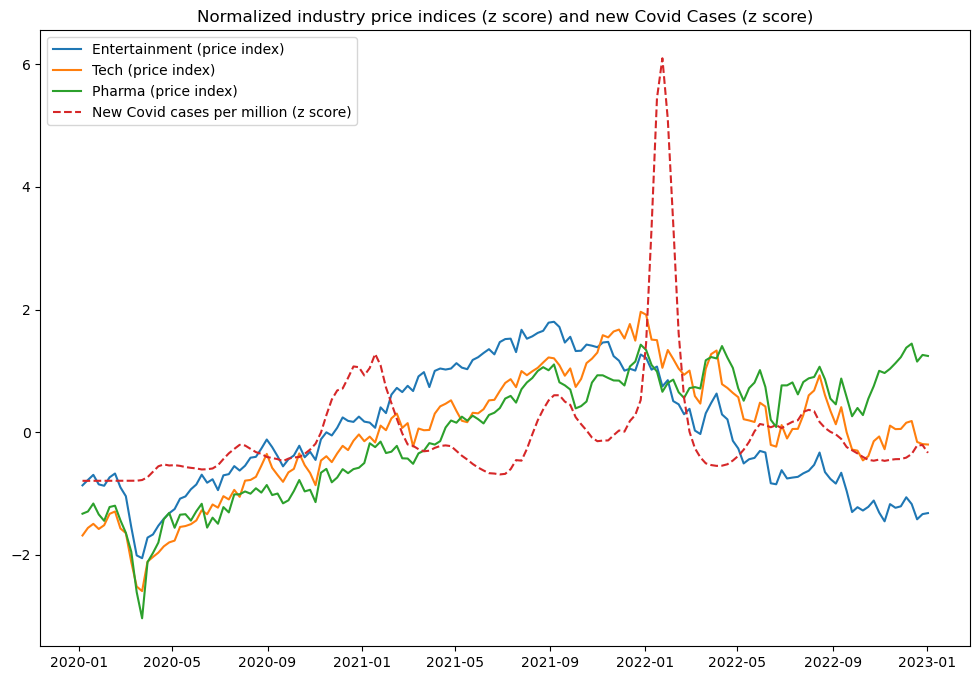

In [96]:
from scipy.stats import zscore

plt.figure(figsize=(12,8))
for i, col in enumerate(industry1.columns):
    plt.plot(industry1.index, zscore(industry1[col]), label=f'{col} (price index)')
plt.plot(covid4Index.index, zscore(covid4Index['new_cases_smoothed_per_million']), '--', label='New Covid cases per million (z score)')

plt.legend()
plt.title("Normalized industry price indices (z score) and new Covid Cases (z score)")
#plt.savefig("Normalized industry price indices and new Covid Cases.png")
plt.show()

### Visual comparison between covid Deaths and industry

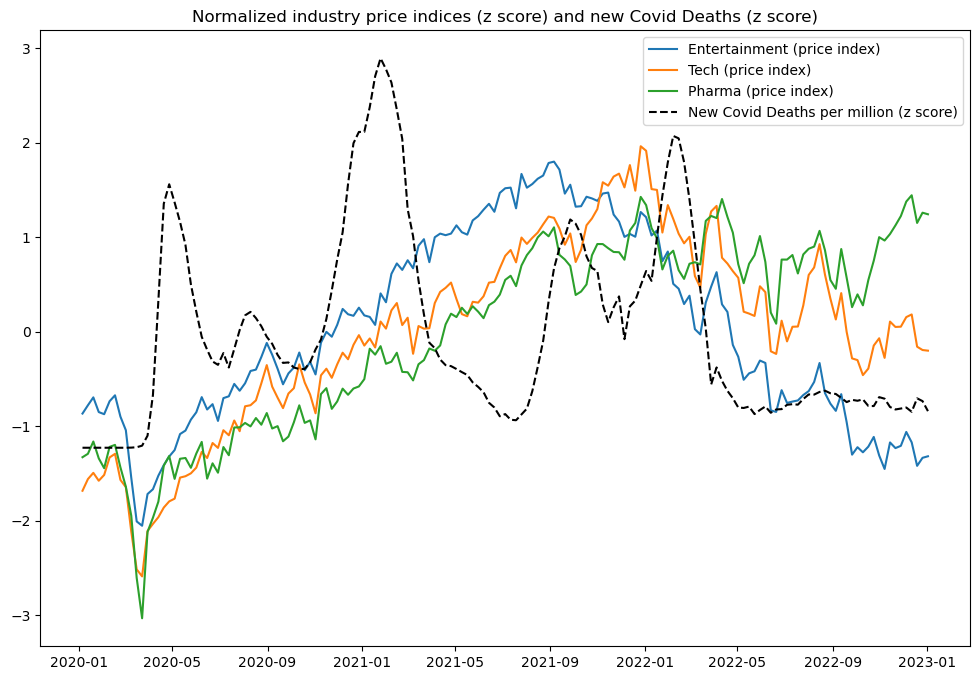

In [97]:

plt.figure(figsize=(12,8))
for i, col in enumerate(industry1.columns):
    plt.plot(industry1.index, zscore(industry1[col]), label=f'{col} (price index)')
plt.plot(covid4Index.index, zscore(covid4Index['new_deaths_smoothed_per_million']), '--', label='New Covid Deaths per million (z score)', 
         color = 'k')

plt.legend()
plt.title("Normalized industry price indices (z score) and new Covid Deaths (z score)")
#plt.savefig("Normalized industry price indices and new Covid Deaths.png")
plt.show()

### Visual comparison between population and industry

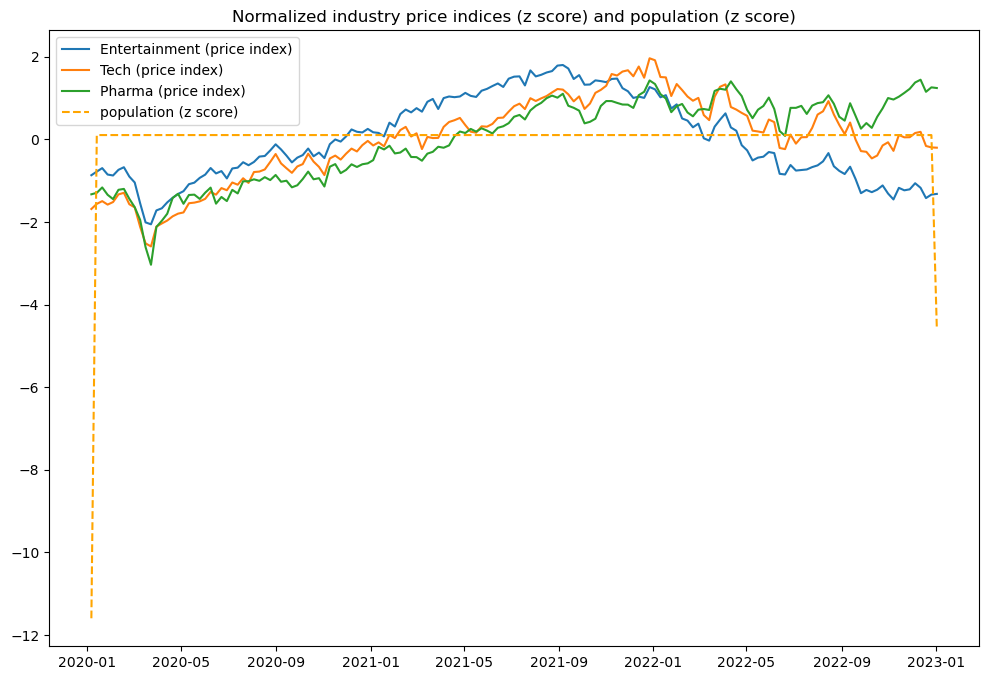

In [98]:
plt.figure(figsize=(12,8))
for i, col in enumerate(industry1.columns):
    plt.plot(industry1.index, zscore(industry1[col]), label=f'{col} (price index)')
plt.plot(covid4Index.index, zscore(covid4Index['population']), '--', label='population (z score)', 
         color = 'orange')

plt.legend()
plt.title("Normalized industry price indices (z score) and population (z score)")
#plt.savefig("Normalized industry price indices and population.png")
plt.show()

### Visual comparison between Covid Cases and Covid Deaths

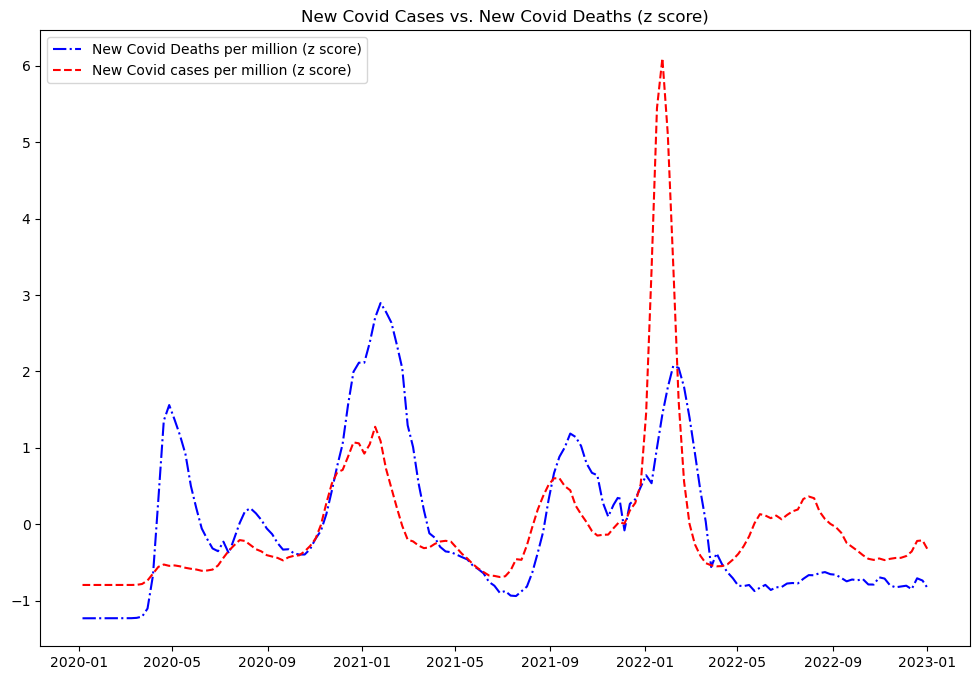

In [99]:
plt.figure(figsize=(12,8))
plt.plot(covid4Index.index, zscore(covid4Index['new_deaths_smoothed_per_million']), 
         '-.', label='New Covid Deaths per million (z score)', color = 'b')
plt.plot(covid4Index.index, zscore(covid4Index['new_cases_smoothed_per_million']), 
         '--', label='New Covid cases per million (z score)', color = 'r')

plt.legend()
plt.title("New Covid Cases vs. New Covid Deaths (z score)")
#plt.savefig("New Covid Cases vs. New Covid Deaths.png")
plt.show()

## Finding correlation

In [100]:
correlationCovInd = covIndustry[['new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 'Entertainment', 'Tech', 'Pharma']].corr()
correlationCovInd

,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,Entertainment,Tech,Pharma
new_cases_smoothed_per_million,1.000000,0.525437,0.299568,0.423645,0.292126
new_deaths_smoothed_per_million,0.525437,1.000000,0.337906,0.218524,-0.012352
Entertainment,0.299568,0.337906,1.000000,0.764546,0.451399
Tech,0.423645,0.218524,0.764546,1.000000,0.878375
Pharma,0.292126,-0.012352,0.451399,0.878375,1.000000


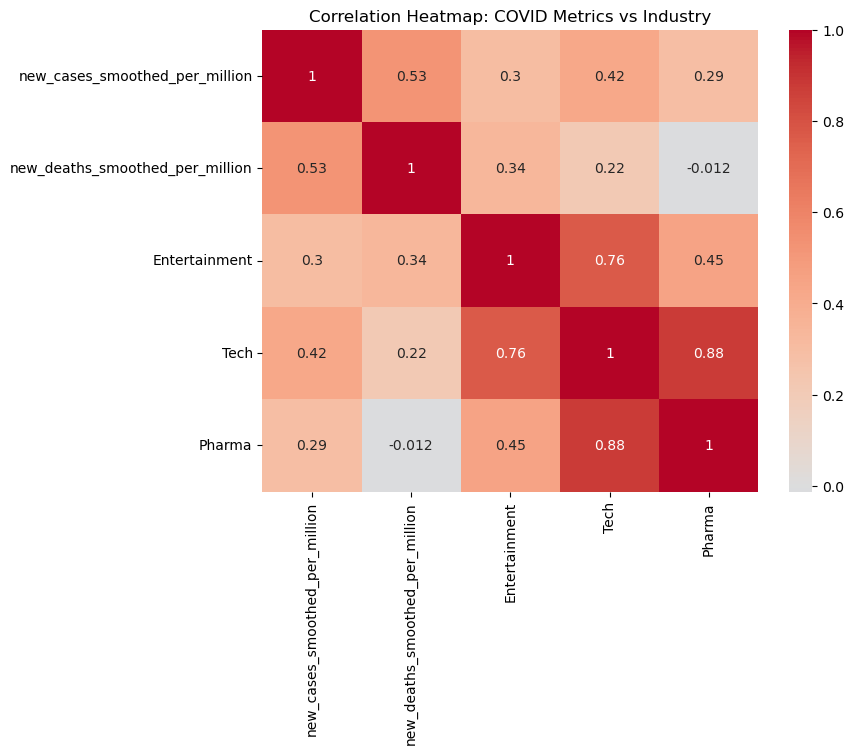

In [101]:
plt.figure(figsize=(8,6))
sns.heatmap(correlationCovInd, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: COVID Metrics vs Industry')
#plt.savefig("Correlation Heatmap: COVID Metrics vs Industry.png")
plt.show()

## Sources and Citations 

### Edouard Mathieu, Hannah Ritchie, Lucas Rodés-Guirao, Cameron Appel, Daniel Gavrilov, Charlie Giattino, Joe Hasell, Bobbie Macdonald, Saloni Dattani, Diana Beltekian, Esteban Ortiz-Ospina, and Max Roser (2020) - “COVID-19 Pandemic” Published online at OurWorldinData.org. Retrieved from: 'https://ourworldindata.org/coronavirus' [Online Resource]

### Roussi, Ran. yfinance: Yahoo! Finance Market Data Downloader. Version yfinance 0.2.66, 2025, PyPI, https://pypi.org/project/yfinance/. 


## Exporting project

In [102]:
#covIndLog.to_csv('covid_industry_logret.csv')
#covIndustry.to_csv('covid_industry.csv')
#industry1.to_csv('industry_index_normalized.csv')